# PWAVE-B

P-wave bayonet

Note: The P-Wave Bayonet and the P-Wave Caliper are part of the same instrument. 


In [4]:
# force Jupyter to autoreload modules when they have been edited
# this helps keep the iodp module current as it is actively developed.
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
import sys
import os
from importlib import reload

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from iodp import utils, pwave_bc



In [6]:
# Ensure we are in the PhysicalProperties root folder
if not os.getcwd().endswith("PhysicalProperties"):
    print("Current working directory:", os.getcwd())
    os.chdir("../")
    
print("New current working directory:", os.getcwd())

New current working directory: d:\archive\hd_files\data_analysis\50_laboratory_notebooks\SOD-Laboratory\PhysicalProperties


## Read PWAVE-B .PWC files

In [7]:
file = './data/input/PWAVE-B/y-bayonet_396-u1565b-1r-1-w_shlf11054261_2108160657583.pwc'
df = utils.read_instrument_file(file,as_dataframe=True)
df

,datetime,labelid,user,text_id,instrument,instrument_group,comments,distance_in_caliper,travel_time,offset,velocity_y,manual_pick_travel_time,manual_pick_velocity_y,timestamp,system_delay,run,config,transducer_signal,aux_file
0,21-08-16 06:57:583 UTC,396-U1565B-1R-1-W,,SHLF11054261,BAYONET-Y,GANTRY,,31.500,-1.30,55.90,-24261.93,23.04,1366.96,2021-08-16 06:56:49,1.2162,c:\data\in\y-bayonet_396-u1565b-1r-1-w_shlf110...,c:\ims\config_velocity\velocity.ini,c:\data\in\signal\y-bayonet_396-u1565b-1r-1-w_...,c:\aux_data\pwave-b\bayonet-y\396-u1565b-1r-1-...


## Read PWAVE-B .ini files

In [8]:
file = './data/input/PWAVE-B/velocity.ini'
df = utils.read_instrument_ini(file, as_dataframe=True)
df

,value
key,
mgi rwa section options,2.0.1 %04Y%02m%02d %02H%02M%S%25u*~|.%d*~|....
instrument group,GANTRY
caliper.enabled?(t),FALSE
caliper.inst offset,1.580142857143
caliper.system delay,3.804339715469E-6
...,...
z-bayonet .wfm window,8000
velocity filter.high,0
velocity filter.low,0


## Read PWAVE-B .lvm files


In [34]:
data

{'writer_version': '2',
 'reader_version': '2',
 'operator': 'daq',
 'description': 'Transducer signal file .LVM (ASCII)',
 'date': '2022/06/23',
 'time': '18:01:19.3878006935119628906',
 'channels': '1',
 'samples': '8000',
 'delta_x': '1.000000E-8'}

In [11]:
file = './data/input/PWAVE-B/y-bayonet_396-u1565b-1r-1-w_shlf11054261_signal_2108160657583.lvm'
df = pwave_bc.read_pwavec_lvm_file(file)
df

,writer_version,reader_version,operator,description,date,time,channels,samples,delta_x,X_Value,Untitled
0,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,0.000000,0.000000
1,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,1.000000E-8,0.000000
2,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,2.000000E-8,0.000000
3,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.000000E-8,0.000000
4,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,4.000000E-8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3995,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.995000E-5,0.000764
3996,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.996000E-5,0.000711
3997,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.997000E-5,0.000614
3998,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.998000E-5,0.000546


# Exploring PWAVE-B

In [12]:
df = pwave_bc.read_pwavec_lvm_file(file)
df

,writer_version,reader_version,operator,description,date,time,channels,samples,delta_x,X_Value,Untitled
0,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,0.000000,0.000000
1,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,1.000000E-8,0.000000
2,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,2.000000E-8,0.000000
3,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.000000E-8,0.000000
4,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,4.000000E-8,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
3995,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.995000E-5,0.000764
3996,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.996000E-5,0.000711
3997,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.997000E-5,0.000614
3998,2,2,daq,Transducer signal file .LVM (ASCII),2021/08/14,19:22:50.834686279296875,1,4000,1.000000E-8,3.998000E-5,0.000546


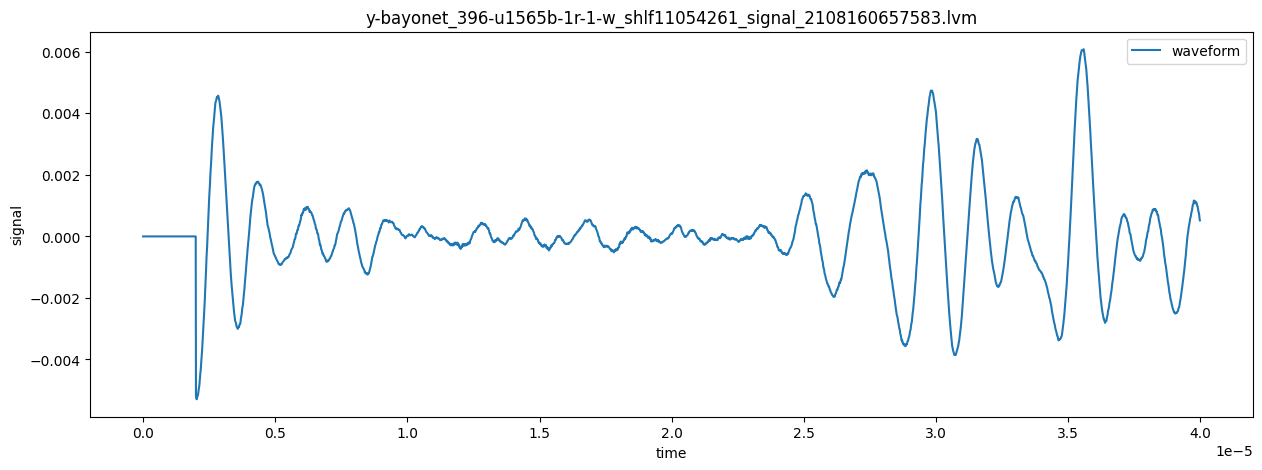

In [14]:
fig, ax = plt.subplots(1,1,figsize=(15,5))
ax.plot(
    df['X_Value'].astype(float),
    df['Untitled'].astype(float),
    label="waveform"
)

ax.set_ylabel('signal')
ax.set_xlabel('time')
ax.set_title(f"{os.path.split(file)[-1]}")
ax.legend()
plt.show()